### Kaggle Competition - Walmart Recruiting - Store Sales Forecasting

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


### 1. Dataset overview

#### 1.1 **'stores.csv'**

In [5]:
stores_df = pd.read_csv('stores.csv')

stores_df.head(8)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078


In [6]:
stores_df.shape

(45, 3)

store.csv

45 rows,  
45 Walmart stores located in different regions

Features:

- [Store] - the store numebr
- [Type] - the type of store
- [Size] - the size of the store

#### 1.2 **'features.csv'**

In [7]:
features_df = pd.read_csv('features.csv')

features_df.head(8)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False


In [11]:
features_df.tail(8)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8182,45,2013-06-07,70.71,3.633,9977.82,744.29,80.00,4825.71,3597.34,NaN,NaN,False
8183,45,2013-06-14,70.01,3.632,2471.44,517.87,348.54,2612.33,3459.39,NaN,NaN,False
8184,45,2013-06-21,70.13,3.626,4989.34,385.31,178.56,2463.42,3117.94,NaN,NaN,False
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [8]:
features_df.shape

(8190, 12)

features.csv

8190 rows,  
This file contains additional data related to the store, department, and regional activity for the given dates.

Features:

- [Store] - the store number
- [Date] - the week
- [Temperature] - average temperature in the region
- [Fuel_Price] - cost of fuel in the region
- [MarkDown1-5] - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
- [CPI] - the consumer price index
- [Unemployment] - the unemployment rate
- [IsHoliday] - whether the week is a special holiday week

#### 1.3 **'train.csv'**

In [9]:
train_df = pd.read_csv('train.csv')

train_df.head(8)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False


In [10]:
train_df.shape

(421570, 5)

train.csv

421570 rows,  
This is the historical training data, which covers to 2010-02-05 to 2012-11-01

Features:

- [Store] - the store number
- [Dept] - the department number
- [Date] - the week
- [Weekly_Sales] -  sales for the given department in the given store
- [IsHoliday] - whether the week is a special holiday week

#### 1.4 **'test.csv'**

In [12]:
test_df = pd.read_csv('test.csv')

test_df.head(8)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False


In [13]:
test_df.shape

(115064, 4)

test.csv

115064 rows,  
This file is identical to train.csv, except we have withheld the weekly sales. 

Features:

- [Store] - the store number
- [Dept] - the department number
- [Date] - the week
- [IsHoliday] - whether the week is a special holiday week



### 2. Explore Datasets

#### 1.1 **'stores_df'**

In [18]:
stores_df.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [16]:
# no missing value
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [45]:
stores_df['Type'].value_counts(dropna = False)

Type
A    22
B    17
C     6
Name: count, dtype: int64

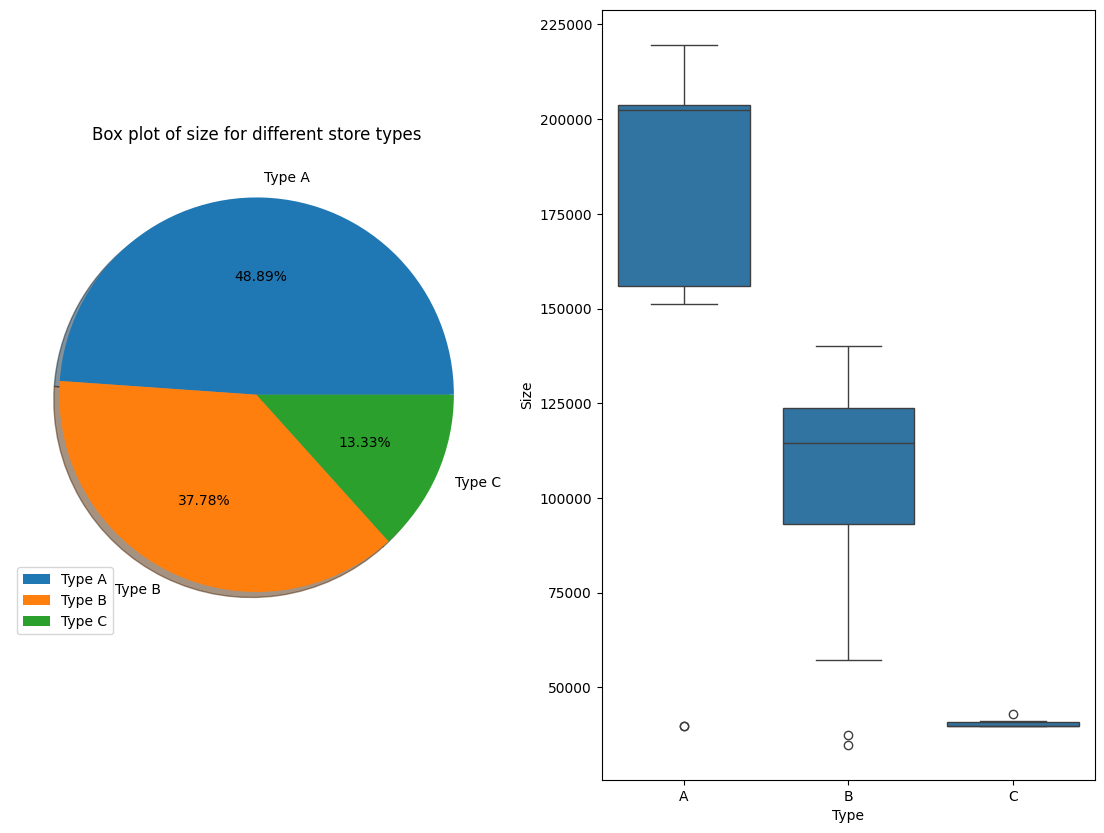

In [44]:
# visualization

type_groups = stores_df.groupby('Type').size()
sizes = [type_groups['A'], type_groups['B'], type_groups['C']]
labels = ['Type A', 'Type B', 'Type C']

# create canvas
fig = plt.figure(figsize = (14,10))

# ============================================
# pie chart for stores with different 'type'

ax_type = fig.add_subplot(121)

ax_type.pie(x = sizes, labels = labels, shadow = True, autopct = '%.2f%%')

ax_type.set_title('Pie chart for different store types')

ax_type.legend(labels, loc = 'lower left')

# ============================================
# box chart for the size of store

ax_size = fig.add_subplot(122)

sns.boxplot(data = stores_df, x = 'Type', y = 'Size', ax = ax_size)

ax_type.set_title('Box plot of size for different store types')


plt.show()